# Random Walks

This week we will discuss a new topic, *random walks*. Random walks are an example of a markov process, and we will also learn what this means, and how we can analyze the behavior of the random walker using a markov chain.

The exercises this week are slightly more extensive then other weeks, and is more of a project based work than earlier exercise sets as well. This is because the plan is to cover some of these exercises in L20, i.e., the lecture on Friday November 8th. It it therefore recommended that you work on the exercises before Thursday. If you cannot attend the lecture on Friday, it is strongly recommended to take a good look at the example solutions, which I will upload during Friday's lecture.


## Random Walks

A random walk is a process where we follow some object taking *random steps*. The path the object walks then defines a random path, or trajectory. Random walks are powerful mathematical objects with a large number of use cases, but we will return to this point later, for now let us look at some actual random walks.


### The 1D Random Walker

A random walk can refer to many different processes, but let us start of with perhaps the simplest of them all, a 1D random walk on a regular grid. Assume some walker starts of at $x=0$. Now it takes steps to the left or right at random, with equal probability.

```{figure} ../../figures/1D_walk.png
---
width: 600px
name: 1D_walk
alt: 1D_walk
---
```


We denote the position of the walker after $N$ steps by $X_N$. Because the walker is taking random steps, $X_N$ is what we call a *random* or *stochastic variable*, it won't have a specific value in general, but be different for each specific random walk, depending on what steps are actually taken.

For each step the walker takes, we move either 1 step to the left, or 1 step to the right. Thus

$$X_{N+1} = X_{N} + K_N,$$

where $K_N$ is the $N$'th step taken. We assume that all steps are independent of all others, and that each step has an equal chance of being to the left or to the right, so
$$K_N = \begin{cases}
1 & \mbox{with 50} \% \mbox{ chance} \\
-1 & \mbox{with 50}\% \mbox{ chance}
\end{cases}$$

Let us look at how a random walk looks. To draw the step $K_N$ using numpy, we use `np.random.randint(2)`, but this gives us 0 or 1, so we instead use `2*np.random.randint(2) - 1`, which will then give us -1 or 1 with equal probability.

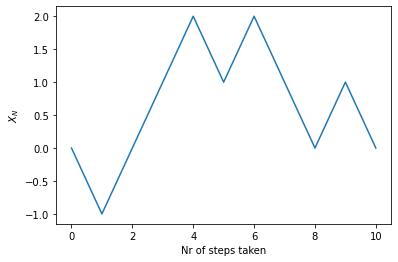

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

nr_steps = 10
X = np.zeros(nr_steps+1)

X[0] = 0
for N in range(nr_steps):
    X[N+1] = X[N] + 2*np.random.randint(2) - 1

plt.plot(range(nr_steps+1), X)
plt.xlabel('Nr of steps taken')
plt.ylabel(r'$X_N$')
plt.show()


Simply using `plt.plot` here can be a bit misleading, so we can alternatively change the plot style, or we can change to use the `plt.step` function instead:

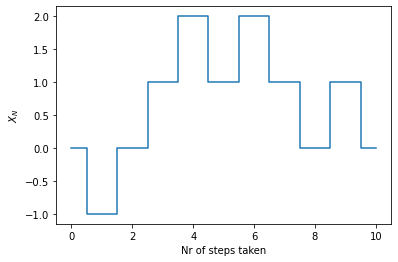

In [2]:
plt.step(range(nr_steps+1), X, where='mid')
plt.xlabel('Nr of steps taken')
plt.ylabel(r'$X_N$')
plt.show()

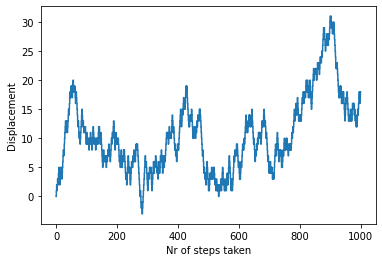

In [3]:
nr_steps = 1000
X = np.zeros(nr_steps+1)

X[0] = 0
for N in range(nr_steps):
    X[N+1] = X[N] + 2*np.random.randint(2) - 1

plt.step(range(nr_steps+1), X, where='mid')
plt.xlabel('Nr of steps taken')
plt.ylabel('Displacement')
plt.show()

### Vectorized Random Walk

As we saw last week, if we want to repeatedly draw and use random numbers, `np.random` can be used in a vectorized way to be more efficient. Let us see how we can do this for a random walk.

Drawing the steps themselves is straight forward:

In [4]:
nr_steps = 1000
steps = 2*np.random.randint(2, size=nr_steps) - 1

But now we need to combine these steps into the variable $X_N$. Now, if we only want to know the final displacement after all the steps, then we could simply do the sum
$$X_{1000} = \sum_{i=1}^{1000} K_i.$$
However, if we want to plot out the full trajectory of the walk, then we need to compute all the partial sums as well, i.e., find $X_N$ for $N=1, 2, 3, \ldots 1000.$

We can do this with the function `np.cumsum`, which stands for *cumulative sum*. Taking the cumulative sum of a sequence gives a new sequence where element $n$ of the new sequence is the sum of the first $n$ elements of the input. Thus, the cumulative sum of $K_N$ will give $X_N$.

In [5]:
X = np.zeros(nr_steps + 1)
X[0] = 0
X[1:] = X[0] + np.cumsum(steps)

Note that we could have simply said `X = np.cumsum(steps)`, but in that case, $X_0$ wouldn't be 0, it would be -1 or 1. That's not a big deal, but we take the extra step of defining $X_0 = 0$, and then finding the rest of $X_N$ for $N > 100$.

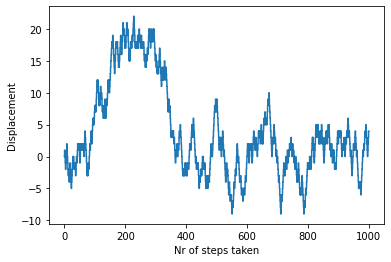

In [6]:
plt.step(range(nr_steps+1), X, where='mid')
plt.xlabel('Nr of steps taken')
plt.ylabel('Displacement')
plt.show()

### Many Walkers

Because the walker is completely random, understanding how it behaves from looking at a single walker isn't that useful. Instead, we can look at a large *ensemble* of walkers, and then perhaps we can gleam some insight into how they behave.

We can also use the vectorization of `np.random` to draw the walks of many different walkers in a vectorized manner:

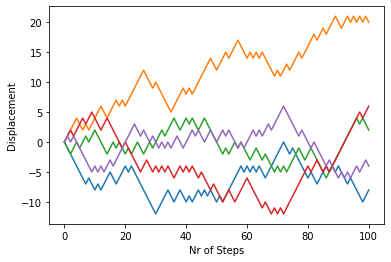

In [7]:
nr_steps = 100
walkers = 5

X = np.zeros((nr_steps+1, walkers))
X[0, :] = 0

steps = 2*np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X)
plt.xlabel('Nr of Steps')
plt.ylabel('Displacement')
plt.show()

Or with many more steps:

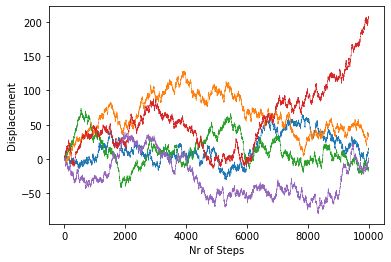

In [8]:
nr_steps = 10000
walkers = 5

X = np.zeros((nr_steps+1, walkers))
X[0, :] = 0

steps = 2*np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X, linewidth=0.5)
plt.xlabel('Nr of Steps')
plt.ylabel('Displacement')
plt.show()

### Very Many Walkers

We have now seen how we can plot 5 walkers. But if we really want to understand the average behavior, we might want to plot a lot more walkers. With our code, this works just fine, but the output won't tell us to much, because it will become too chaotic:

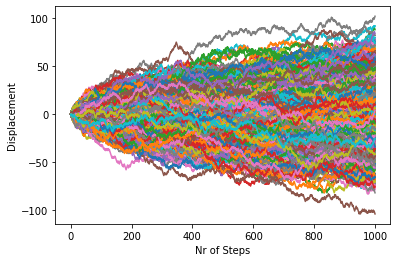

In [9]:
nr_steps = 1000
walkers = 1000

X = np.zeros((nr_steps+1, walkers))
X[0, :] = 0

steps = 2*np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X)
plt.xlabel('Nr of Steps')
plt.ylabel('Displacement')
plt.show()

This plot shows a thousand random walks overlaying each other, but we cannot really see what is going on, because the different lines simply overlap and hide each other.

To fix this, instead of plotting all the walks over each other, we plot the *density* of walkers. We can accomplish this by using the `alpha` keyword to `plt.plot`. This keyword is used to make a line semi-transparent . Here, `alpha=1` is the default, non-transparent line, `alpha=0` is a completely transparent, and thus invisible, line. If we then set for example `alpha=0.1`, we get 10% transparent lines.

With semi-transparent lines, anywhere many lines overlap will give a strong color, if there are fewer lines, we get a weaker color. To emphasize this, let us also only plot black lines, and ignore colors.

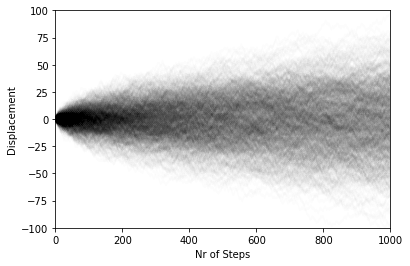

In [10]:
nr_steps = 1000
walkers = 1000

X = np.zeros((nr_steps+1, walkers))
X[0, :] = 0

steps = 2*np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X, alpha=0.01, color='k')
plt.xlabel('Nr of Steps')
plt.ylabel('Displacement')
plt.axis((0, 1000, -100, 100))
plt.show()

At the beginning, all the walkers are close to the origin, as they simply have not had time to get further away. As time progresses towards the right, the walkers spread out. The highest density of walkers is still found in the middle however, as the net sum of steps will tend towards a mean of 0.


### Analyzing the average behavior of a walker

Because the random walk is a random process, predicting how a single walker will move is impossible. However, if we instead look at a lot of walkers, we can analyze their *average* activity. Because of the law of large numbers, we know that the average behavior for a large number of walkers will converge to a specific behavior.

Compare for example the first plot of a single walker. If you rerun this code, you will get a dramatically different behavior, because one specific walk looks very different from one specific different walk. For the last Figure we made however, rerunning the code won't change much, because the average behavior of 1000 walkers will tend to be the same.

One way to explore the average behavior is of course to do simulation, and then simply taking the sample average. For more complex random walk behaviors, this is the only option. Our random walk however, is quite simple, and so we can also analyze it mathematically. Let us do this.

#### Average Displacement

First we want to know the average displacement of a large number of walkers? For a single walker, the position of the walker after $N$ steps was given by
$$X_N = X_0 + \sum_{i=1}^N K_i.$$
or alternatively:
$$X_{N+1} = X_{N} + K_N.$$

Now, we want to compute the *average* of this variable, which we will denote $\langle X_N \rangle$, another word for this value is the *expected value* or *expectation*. If you have not heard these terms before, simply think of the value as the average of a large number of walkers.

Taking the average of the $X_N$ gives:

$$\langle X_{N+1} \rangle = \langle X_N + K_N \rangle.$$

However, taking an average is a linear operation, and so we can split the right hand side into

$$\langle X_{N+1} \rangle = \langle X_N \rangle + \langle K_N \rangle.$$

Now, we don't know $\langle X_{N} \rangle,$ because this is what we are actually trying to find. However, $\langle K_N \rangle$, we know, because it is simply the average of the two outcomes:
$$\langle K_N \rangle = \frac{1}{2}\cdot1 +  \frac{1}{2}\cdot (-1) = \frac{1}{2} - \frac{1}{2} = 0.$$

Because there is an equal chance of taking a step to the left and the right, the *average* displacement for a single step will be 0. Inserting this gives

$$\langle X_{N+1} \rangle = \langle X_{N} \rangle.$$

If the walkers start in $X_0 = 0$, then $\langle X_0 \rangle =0$, which in turn implies $\langle X_1 = 0$, and then $\langle X_2 \rangle = 0$ and so on. Giving

$$\langle X_{N}\rangle = 0.$$

This expression tells us that the average displacement of a large number of walkers will be 0, no matter how many steps they take. Is this not surprising? We have seen that the more steps the walkers take, the longer away from the origin they will tend to move, so why is the average 0?

The average is 0 because we are looking at a completely *uniform* and symmetric walker. The walkers have an equal chance of moving left, or right, from the origin, and the average will therefore tend to be 0, even if the walkers move away from the origin.


#### Averaged Square Displacement

The average displacement became 0 because the problem is completely symmetric. However, if we now instead look at the squared displacement $X_N^2$, we get a better feel for how far away from the origin things move, because the square is positive regardless of wether the walker moves away in the positive or negative direction.

We can write out an expression for $X_{N+1}^2$ as

$$X_{N+1}^2 = (X_{N} + K_N)^2 = X_{N}^2 + 2X_N \cdot K_N + K_N^2.$$

Again we care about the average, so we take the average of this expression:

$$\langle X_{N+1}^2 \rangle = \langle X_{N}^2 \rangle + 2\langle X_N \cdot K_N \rangle + \langle K_N^2 \rangle.$$

Now, the term $\langle X_N \cdot K_N \rangle$ will again be zero, because $K_N$ is independent of $X_N$ and has an equal chance of being positive and negative. So we get
$$\langle X_{N+1}^2 \rangle = \langle X_N^2 \rangle + \langle K_N^2 \rangle.$$
Let us compute $\langle K_N^2 \rangle$:
$$\langle K_N^2 \rangle = \frac{1}{2}(1)^2 + \frac{1}{2}(-1)^2 = \frac{1}{2} + \frac{1}{2} = 1.$$
Thus we get

$$\langle X_{N+1}^2 \rangle = \langle X_N^2 \rangle + 1.$$

If we say that $X_0 = 0$, we then get that $\langle X_1 \rangle = 1$, $\langle X_2 \rangle = 2$, and so on:

$$\langle X_N^2 \rangle = N.$$

So we see that while the average displacement does not change over time: $\langle X_N \rangle = 0$, the average squared displacement does! In fact, the squared displacement grows linearly with the number of steps $N$. The longer a random walk carries on for, the further away from the origin the walker will tend to move.

This expression also tells us that the *variance* of the walkers, because the variance of random variable can always be written as

$$\text{Var}(X_N) = \langle X_N^2 \rangle - \langle X_N \rangle^2,$$
and so in this case
$$\text{Var}(X_N) = N - 0^2 = N.$$
So thar variance of $X_N$ is also $N$.


#### Root Mean Square Displacement

While it is clear from the expression
$$\langle X_N^2 \rangle = N,$$

that the walkers will tend to move further away from the origin, this is the *squared* displacement. A more intuitive quantity would perhaps be the average absolute *displacement*, i.e., $\langle |X_N| \rangle$. This would be a useful quantity, but it turns out to be a bit tricky to compute.

As an easier solution, we just take the root of the mean squared displacement:

$$\text{RMS} = \sqrt{\langle X_N^2 \rangle} = \sqrt{N}.$$

This quantity is known as the *root mean square* displacement (RMS). It won't be exactly the same as $\langle |X_N| \rangle$, but it will be close to it.

Because the root mean square displacement grows as $\sqrt{N}$, we see that a 1D random walker will tend to be about $\sqrt{N}$ away from the origin after taking $N$ steps.



### Plotting the RMS

Let us verify our statement. We repeat our density plot with 1000 walkers, but now we also plot in our expression for the RMS: $\sqrt{N}$:

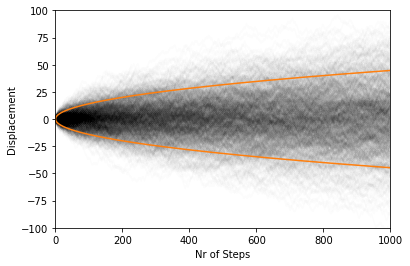

In [11]:
N = 1000
walkers = 1000

k = 2*np.random.randint(2, size=(N, walkers)) - 1
X = np.cumsum(k, axis=0)

plt.plot(X, alpha=0.01, color='k')
plt.plot(range(N), np.sqrt(2*np.arange(N)), color='C1')
plt.plot(range(N), -np.sqrt(2*np.arange(N)), color='C1')
plt.xlabel('Nr of Steps')
plt.ylabel('Displacement')
plt.axis((0, 1000, -100, 100))
plt.show()

We see that the density of walkers inside the RMS curves is higher than outside it. This makes sense, because the root-mean-square will tend to give outliers more weight. The RMS curves still seem very reasonable, as they clearly indicate the rough region where most walkers will be found. We also see that the scaling seems reasonable.

Instead of plotting it, we can also compute the actual root-mean-square of our 1000 walkers, which is then a *sample mean*, and compare it to our analytical expression.

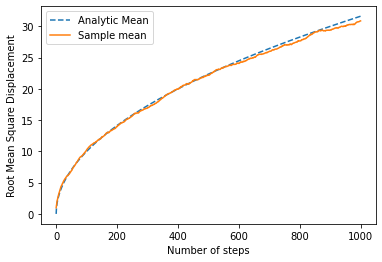

In [12]:
N = 1000
walkers = 1000

k = 2*np.random.randint(2, size=(N, walkers)) - 1
X = np.cumsum(k, axis=0)

RMS = np.sqrt(np.mean(X**2, axis=1))

plt.plot(np.arange(N), np.sqrt(np.arange(N)), '--', label="Analytic Mean")
plt.plot(np.arange(N), RMS, label="Sample mean")
plt.legend()
plt.xlabel('Number of steps')
plt.ylabel('Root Mean Square Displacement')
plt.show()

So we see that our analytic expression looks very reasonable.


### Flipping Coins and the Law of Large Numbers

So far we have only look at the random walk as a completely theoretical exercise. As an example, let us now couple it to some more concrete situation.

Our 1D random walk is the sum of a discrete random variable that has 2, equally likely outcomes. An example of this is flipping a coin. Thus, our random walk models the process of flipping a coin many times and keeping track of the total number of heads and tails we get.

We looked at this example last week as well:

In [13]:
def flip_coins(N):
    flips = np.random.randint(2, size=N)
    heads = np.sum(flips == 0)
    tails = N - heads
    return heads, tails


print("Flipping 1000 coins:")
heads, tails = flip_coins(1000)
print("Heads:", heads)
print("Tail:", tails)

Flipping 1000 coins:
Heads: 477
Tail: 523


When we flip $N$ coins, we expect close an equal number of heads and tails, i.e., about $N/2$ of each. But should we expect exactly $N/2$ heads? The answer is *no*. The probability of getting a perfectly even distribution goes *down* with the number of throws $N$. Let us look at some numbers:

In [14]:
print(f"{'N':>10} {'Heads':>10}|{'Tails':<6} {'Deviation':>12}  {'Ratio':>10}")
print("="*60)

for N in 10, 1000, 10**4, 10**5, 10**6:
    for i in range(3):
        heads, tails = flip_coins(N)
        print(f"{N:>10} {heads:>10}|{tails:<6} {abs(N/2-heads):10}  {heads/N:>10.1%}|{tails/N:<6.1%}")
    print()
print("="*60)

         N      Heads|Tails     Deviation       Ratio
        10          6|4             1.0       60.0%|40.0% 
        10          4|6             1.0       40.0%|60.0% 
        10          4|6             1.0       40.0%|60.0% 

      1000        507|493           7.0       50.7%|49.3% 
      1000        503|497           3.0       50.3%|49.7% 
      1000        503|497           3.0       50.3%|49.7% 

     10000       4977|5023         23.0       49.8%|50.2% 
     10000       5000|5000          0.0       50.0%|50.0% 
     10000       4987|5013         13.0       49.9%|50.1% 

    100000      49825|50175       175.0       49.8%|50.2% 
    100000      49935|50065        65.0       49.9%|50.1% 
    100000      50048|49952        48.0       50.0%|50.0% 

   1000000     499252|500748      748.0       49.9%|50.1% 
   1000000     499766|500234      234.0       50.0%|50.0% 
   1000000     500024|499976       24.0       50.0%|50.0% 



Here, we explore how the *deviation*, which is the number of flips we are away from a perfectly even split, grows with $N$. What we call the deviation here is equivalent to the displacement of one of our random walkers, and as we have seen, the root mean square displacement grows as $\sqrt{N}$. The more coins we flip $N$, the bigger deviation from the baseline we expect.

Now, isn't this contradicting the law of large numbers? No, it isn't, but it actually highlights an important point about the law of large numbers. The law of large numbers only guarantees that the *average* of many trials will approach the expected value for large numbers. Thus the law of large numbers states that the *ratio* of heads and tails will become 50%/50% in the long run, it gives not guarantee that we will have the same number of outcomes.

In fact ,we see that this is indeed the case for our results too, while the deviation grows with $N$, we can see for the exact same random sample that the *ratio* of heads and tails approaches 50/50! This is because the ratio is computed from

$$P(\text{heads}) \approx \frac{\text{number of heads}}{N},$$

but we know that the deviation in the number of heads grows as $\sqrt{N}$, but that means the deviation in the *ratio* grows as

$$\frac{\sqrt{N}}{N} = \frac{1}{\sqrt{N}}.$$
And so our results don't contradict the law of large numbers, it proves it.

The law of large numbers only talks about averages, never about single events. However, it is a very common fallacy to think that the number of heads and tails have to *even out* in the long run. This is known as the *Gambler's Fallacy*.


### 2D Random Walk

So far we have only looked at a random walk in one dimension. Let us add another dimension, so we are looking at a random walker moving around in a 2D plane. We will still be looking at a random walk on a regular grid or lattice.

For every step, there are then 4 choices for our walker. If we envision our grid as the streets of a city seen from above, these directions would be *north*, *south*, *west*, and *east*. We now denote the displacement of the walker as

$$\vec{R}_N = (X_N, Y_N).$$

Let us jump right into simulating a random walk.

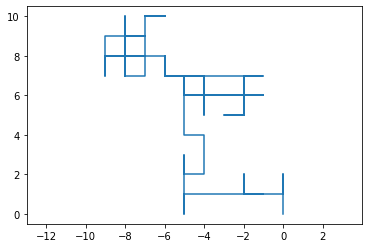

In [15]:
possible_steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

N = 100
R = np.zeros((N+1, 2))
R[0] = (0, 0)

for i in range(N):
    step = possible_steps[np.random.randint(4)]
    R[i+1] = R[i] + step

X = R[:, 0]
Y = R[:, 1]
plt.plot(X, Y)

plt.axis('equal')
plt.show()

Here we specify the possible steps, and then draw one of these at random for every step. Performing this vectorized is slightly tricky. to make things a lot simpler, we simply change the possible steps to saying that the walker takes a step in both dimensions for each step, so instead of

$$(1, 0) \quad (-1, 0) \quad (0, 1) \quad (0, -1),$$
as our possibilities, we have
$$(1, 1) \quad (1, -1) \quad (-1, 1) \quad (-1, 1).$$

This makes things a lot easier, cause the steps in the $X$ and $Y$ direction are now decoupled.

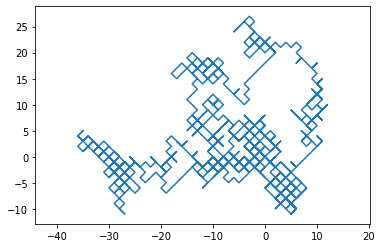

In [16]:
N = 1000
steps = 2*np.random.randint(2, size=(N, 2)) - 1
R = np.cumsum(steps, axis=0)

X = R[:, 0]
Y = R[:, 1]

plt.plot(X, Y)
plt.axis('equal')
plt.show()

The only difference with our change to the steps is that our walker now walks a distance $\sqrt{2}$ every step, instead of 1. The plot also looks like the diagonal version of the previous plot.


Let us try to plot many more steps:

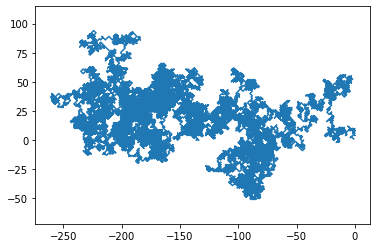

In [17]:
N = 25000
steps = 2*np.random.randint(2, size=(N, 2)) - 1
R = np.cumsum(steps, axis=0)

X = R[:, 0]
Y = R[:, 1]

plt.plot(X, Y)
plt.axis('equal')
plt.show()

Because our walker is now using 2 spatial dimensions, we cannot plot this walk over time, we can only plot out the total trajectory over time. This has some drawbacks, as it is hard to understand how the walk builds up over time, and how much the walk doubles back over itself.


A fix to this is to create an animation of the walk over time. We won't take the time to do this here. But you can click the links under to see such animations:
1. [Animated random walk in 2D with 2500 steps](https://upload.wikimedia.org/wikipedia/commons/f/f3/Random_walk_2500_animated.svg)
2. [Animated random walk in 2D with 25000 steps](https://upload.wikimedia.org/wikipedia/commons/c/cb/Random_walk_25000.svg)



### Plotting several walkers

Again we can plot several walks over each other

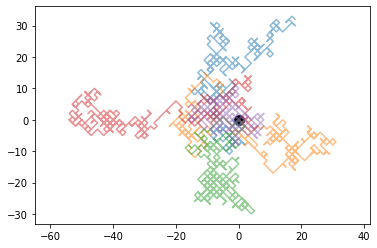

In [18]:
nr_steps = 500
nr_walkers = 5

for walker in range(nr_walkers):
    steps = 2*np.random.randint(2, size=(nr_steps, 2)) - 1
    R = np.cumsum(steps, axis=0)

    X = R[:, 0]
    Y = R[:, 1]

    plt.plot(X, Y, alpha=0.5)
    plt.axis('equal')

plt.scatter(0, 0, marker='o', color='black', s=100)
plt.show()

Here, we plot 5 random walks over each other, and mark the origin with a black circle.


### Analyzing the Mean Displacement

We can now return to analyze the average behavior of the 2D random walker, just like we did for the 1D case. However, it turns out we don't need to reinvent the wheel. We know that
$$\vec{R}_N   = (X_N, Y_N).$$
So to find the mean displacement, we find
$$\langle \vec{R}_N \rangle = (\langle X_N \rangle, \langle Y_N \rangle).$$

However, both $X_N$ and $Y_N$ behave exactly like a 1D-walker in their dimension, as they increase by -1 or 1 every step. So we have

$$\langle \vec{R}_N \rangle = (0, 0).$$

We could almost have guessed this, because the 2D problem is, just like the 1D problem, completely symmetric. The average will therefore tend to be the exact origin.

But what about the mean square displacement? In this case, taking the square of the vector means taking the dot product with itself, it is thus the square of the distance to the origin we are computing:
$$\langle |\vec{R_N}|^2 \rangle = \langle X_N^2 \rangle + \langle Y_N^2 \rangle.$$

So again we can simply insert the values we found earlier for the 1D walker:

$$\langle |\vec{R_N}|^2 \rangle = 2N.$$

Thus, the root mean square distance of a 2D random walker to the origin is given by

$$\text{RMS} = \sqrt{\langle |\vec{R_N}|^2 \rangle} = \sqrt{2N}.$$

We can draw this into our 2D plot, to see if this seems reasonable.

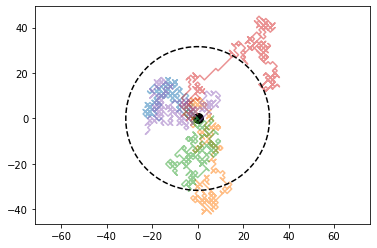

In [19]:
nr_steps = 500
nr_walkers = 5

# Plot random walks
for walker in range(nr_walkers):
    steps = 2*np.random.randint(2, size=(nr_steps, 2)) - 1
    R = np.cumsum(steps, axis=0)
    X = R[:, 0]
    Y = R[:, 1]
    plt.plot(X, Y, alpha=0.5)
    plt.axis('equal')

# Plot origin
plt.scatter(0, 0, marker='o', color='black', s=100)

# Plot analytic RMS
rms = np.sqrt(2*nr_steps)
theta = np.linspace(0, 2*np.pi, 1001)
plt.plot(rms*np.cos(theta), rms*np.sin(theta), 'k--')

# Plot
plt.show()

## Why Random Walkers are so interesting

The random walker is an example of a process that is built up of simple, random steps, but whose net behavior can be complex. These kind of processes are found throughout the natural sciences and in mathematics. The list of applications of random walks is therefore very long and varied.

Some examples of processes that can be modelled with random walks are:
* The price of stocks in economics
* Modeling of population dynamics in biology
* The modeling of genetic drift
* The study of polymers in material science use a special type of self-avoiding random walks
* In image processing, images can be segmented by using an algorithm that randomly walks over the image
* Twitter uses a random walk approach to make suggestions of who to follow

These are just *some* examples, and the list goes on and on. If you want more example, there is a more extensive list [here](https://en.wikipedia.org/wiki/Random_walk#Applications).


## continuous

As a final example, let us show how we can move from a discrete random walk model to a continuous one. As we already have seen some examples of, when we move towards a large number of steps $N$, the movement of the random walker doesn't necessarily look so jagged and force anymore, but *seems* more like a continuous process. And this is the whole trick to moving to a continuous model, letting $N\to\infty$. We obviously cannot do this on a computer, but we can analyze the problem mathematically.


To keep things as simple as possible, we can consider the uniform 1D random walker. Instead of talking about the displacement $X_N$, we now define a function $P(x, t)$ that denotes the probability of finding the walker at position $x$ at time $t$.

Because we have a discrete model, we say that the walker moves a length $\Delta x$ each step, so that the walker will be at a position

$$x_i = i\cdot \Delta x,$$

In addition, we assume the walker takes one step every $\Delta t$ time step, so we can denote a given time as

$$t_j = j\cdot \Delta t.$$

Thus, we are talking about the probability of finding the walker at position $x_i$ at time $t_j$, which is described by the function $P(x_i, t_j)$, or simply $P_{i, j}$ for short.

Now, our goal isn't necessarily to find an expression for $P$, to find an expression for how it develops over time. Or put more formally, we are trying to find an expression for the time-derivative
$$\frac{\partial P(x, t)}{\partial t},$$

i.e., we are trying to find a differential equation. To find a time derivative, we want to find an expression on the form:

$$\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}.$$
Because then we can take the limit $\Delta t \to 0$ to get a derivative.


As we are trying to find the time-derivative of $P(x, t)$, let us write out what we know about stepping forward in time with our model. The probability of finding the walker in position $x_i$ at the *next* time step, must be given by the chance of finding it at the two neighboring grid points at the current time step, so:
$$P(x_i, t_{j+1}) = \frac{1}{2}P(x_{i-1}, t_j) + \frac{1}{2}P(x_{i+1}, t_j).$$

The reasons the two terms have a factor 1/2, is because there is only a 50% chance of a walker in those grid points moving the right direction.


Now, to find an expression for the time derivative, we need to subtract $P(x_i, t_j)$ from both sides.

$$P(x_i, t_{j+1}) - P(x_i, t_j) = \frac{1}{2}\big(P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)\big).$$

The next step is then to divide by $\Delta t$ on both sides

$$\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}=\frac{1}{2\Delta t}\big(P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)\big).$$

Now we are getting very close! However, we cannot take the limit $\Delta t \to 0$ just yet, because then the expression on the right will blow up. However, we can fix this by expanding the fraction by a factor of $\Delta x^2$

$$\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}=\frac{\Delta x^2}{2\Delta t}\frac{P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)}{\Delta x^2}.$$


This helps, because we can now take the limit of $\Delta t \to 0$ and $\Delta x^2 \to 0$ at the *same* time. This way, we can enforce the constraint that we do it in such a manner that
$$\frac{\Delta x^2}{2\Delta t} = \text{constant}.$$

Because this expression will be a constant, we name it $D$. We then have

$$\lim_{\substack{\Delta t \to 0 \\ \Delta x \to 0 \\ D={\rm const.}}}  \bigg[\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}= D \frac{P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)}{\Delta x^2}\bigg].$$


Now, the term on the left was equal to the time derivative of $P$. But the expression on the right is also a derivative, it is the second-order derivative with respect to $x$! So we get
$$\frac{\partial P}{\partial t} = D\frac{\partial^2 P}{\partial x^2}.$$


Let us summarize what we have done, we have said our random walker takes steps of $\Delta x$ in time $\Delta t$, and then taken the limit where both of these go to 0. Effectively, we are saying the walker takes infinitesimally small steps, infinitely fast. This is effectively the same as letting the number of steps taken go to infinity ($N \to \infty$). But at the same time, we do this in the manner in which the total displacement of the walker stays bounded.


Taking the limit of a simple 1D walker has given us a partial differential equation known as the *Diffusion Equation*, or alternatively the *Heat Equation*. This is one of the most fundamental and important equations in the natural sciences, so it is quite astonishing that it can be derived from a simple random walker!

For more information and more detailed derivations, see for example:
- [Mark Kac's classical paper from 1947](http://www.math.hawaii.edu/~xander/Fa06/Kac--Brownian_Motion.pdf)

In practice, one does not use a 1D diffusion equation, but a 3D one:
$$\frac{\partial u}{\partial t} = \nabla^2 u.$$

But this pde can be found by taking the limit of a 3D random walker in exactly the same manner.


### Solving the Diffusion Equation

What is very interesting about what we have just done, is that we have gone from a discrete, numerically solvable problem, into a continuous partial differential equation. This is the opposite process of what we are used to dealing with when we are looking at numerics!

If we want to solve the diffusion equation numerically, we have to discretize the equation again, and move back to the effective 1D walker. If you want to read how that can be done, take a look at this supplemental notebook: [*Solving the 1D Diffusion Equation*](solving_the_1D_diffusion_equation.md).